In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021.csv')

In [89]:
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,280838,C9b6Aa2csiogu3vVp9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555274,555274,280839,CGDT4r4PAbp3mvaI6k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555275,555275,280840,CJUxTk4Qd0kHliUKR9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555276,555276,280841,CknUJi2R1iYJG3li3k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [90]:
df.Label.value_counts()

Label
0    517582
1     37696
Name: count, dtype: int64

In [91]:
#Sampling
# 20% sampling for minority classes and 10% each for majority classes
df_BruteForce_XML = df[df['traffic_category'] == 'Bruteforce-XML']
df_BruteForce_XML = df_BruteForce_XML.sample(frac=0.2, replace=False, random_state=None)

df_BruteForce = df[df['traffic_category'] == 'Bruteforce']
df_BruteForce = df_BruteForce.sample(frac=0.2, replace=False, random_state=None)

df_Probing = df[df['traffic_category'] == 'Probing']
df_Probing = df_Probing.sample(frac=0.2, replace=False, random_state=None)

df_XMRIGCC_CryptoMiner = df[df['traffic_category'] == 'XMRIGCC CryptoMiner']
df_XMRIGCC_CryptoMiner = df_XMRIGCC_CryptoMiner.sample(frac=0.2, replace=False, random_state=None)

df_Background = df[df['traffic_category'] == 'Background']
df_Background = df_Background.sample(frac=0.1, replace=False, random_state=None)

df_Benign = df[df['traffic_category'] == 'Benign']
df_Benign = df_Benign.sample(frac=0.1, replace=False, random_state=None)


In [92]:
# Concatenate the DataFrames
df_saved = pd.concat([df_BruteForce_XML, df_BruteForce, df_Probing, df_XMRIGCC_CryptoMiner, df_Background, df_Benign], ignore_index=True)
df_saved

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,2041,2041,CrqoKe2gAYL408nfMh,103.255.15.23,4220,128.199.242.104,443,9.101493,14,14,...,8.874718e+06,8.874718e+06,8.874718e+06,8.874718e+06,0.0,29200,65160,0,Bruteforce-XML,1
1,533,533,CHl6RZxJXtZOdrpmd,103.255.15.23,14684,128.199.242.104,443,6.608960,14,13,...,6.388833e+06,6.388833e+06,6.388833e+06,6.388833e+06,0.0,29200,65160,0,Bruteforce-XML,1
2,2148,2148,C1uXOu2pbHDVRd4Qz5,103.255.15.23,4654,128.199.242.104,443,16.108199,14,13,...,1.588341e+07,1.588341e+07,1.588341e+07,1.588341e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,719,719,CPH3b02ADMJKQfkTUb,103.255.15.23,15918,128.199.242.104,443,2.171997,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
4,56,56,CubdIs3Y09yCVBJ92h,103.255.15.23,13442,128.199.242.104,443,4.640533,14,13,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,184212,3823,CUoKB42V7E2ZA06w6g,103.255.15.23,31543,8.8.8.8,53,0.025157,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59294,343198,164084,CrvKhs3gHpvDCNyZ0i,103.255.15.27,34926,103.255.15.23,42001,0.000090,1,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,0,29200,Benign,0
59295,342939,163825,CWVruy3dARwxIUxVFe,103.255.15.23,10056,128.199.242.104,443,5.159570,14,13,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Benign,0
59296,415442,236993,C47dT54X88jLkc6jY4,103.255.15.150,39142,128.199.242.104,443,0.284667,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,402,Benign,0


In [93]:
# Save the sampled dataset
df_saved.to_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021_sample.csv',index=0)

In [94]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021_sample.csv')
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,2041,2041,CrqoKe2gAYL408nfMh,103.255.15.23,4220,128.199.242.104,443,9.101493,14,14,...,8.874718e+06,8.874718e+06,8.874718e+06,8.874718e+06,0.0,29200,65160,0,Bruteforce-XML,1
1,533,533,CHl6RZxJXtZOdrpmd,103.255.15.23,14684,128.199.242.104,443,6.608960,14,13,...,6.388833e+06,6.388833e+06,6.388833e+06,6.388833e+06,0.0,29200,65160,0,Bruteforce-XML,1
2,2148,2148,C1uXOu2pbHDVRd4Qz5,103.255.15.23,4654,128.199.242.104,443,16.108199,14,13,...,1.588341e+07,1.588341e+07,1.588341e+07,1.588341e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,719,719,CPH3b02ADMJKQfkTUb,103.255.15.23,15918,128.199.242.104,443,2.171997,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
4,56,56,CubdIs3Y09yCVBJ92h,103.255.15.23,13442,128.199.242.104,443,4.640533,14,13,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,184212,3823,CUoKB42V7E2ZA06w6g,103.255.15.23,31543,8.8.8.8,53,0.025157,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59294,343198,164084,CrvKhs3gHpvDCNyZ0i,103.255.15.27,34926,103.255.15.23,42001,0.000090,1,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,0,29200,Benign,0
59295,342939,163825,CWVruy3dARwxIUxVFe,103.255.15.23,10056,128.199.242.104,443,5.159570,14,13,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Benign,0
59296,415442,236993,C47dT54X88jLkc6jY4,103.255.15.150,39142,128.199.242.104,443,0.284667,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,402,Benign,0


In [95]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 59298 rows and 88 columns


In [96]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              59298 non-null  int64  
 1   Unnamed: 0                59298 non-null  int64  
 2   uid                       59298 non-null  object 
 3   originh                   59298 non-null  object 
 4   originp                   59298 non-null  int64  
 5   responh                   59298 non-null  object 
 6   responp                   59298 non-null  int64  
 7   flow_duration             59298 non-null  float64
 8   fwd_pkts_tot              59298 non-null  int64  
 9   bwd_pkts_tot              59298 non-null  int64  
 10  fwd_data_pkts_tot         59298 non-null  int64  
 11  bwd_data_pkts_tot         59298 non-null  int64  
 12  fwd_pkts_per_sec          59298 non-null  float64
 13  bwd_pkts_per_sec          59298 non-null  float64
 14  flow_p

In [97]:
# summary statistics
df.describe()

,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,59298.000000,59298.000000,59298.000000,59298.00000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,...,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,59298.000000,59298.000000,59298.000000,59298.000000
mean,285018.833148,130470.177257,38495.063914,4775.33480,8.619979,18.758811,19.508297,8.725404,16.076107,1632.278178,...,1.134266e+05,3.349846e+06,4.729665e+06,7.646524e+06,3.886429e+06,7.371509e+05,15467.948986,23230.175689,4228.244241,0.127154
std,169212.066803,101715.318417,18209.055751,12537.42388,78.658475,122.047190,127.763724,75.757352,121.704039,5018.519298,...,1.555861e+06,1.736398e+07,2.225059e+07,7.807572e+07,1.840602e+07,6.884084e+06,14923.849725,29889.890972,10684.398204,0.333149
min,12.000000,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137132.750000,39235.250000,28108.000000,53.00000,0.023379,1.000000,1.000000,1.000000,0.000000,4.277426,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,287196.000000,114076.500000,42596.000000,443.00000,0.027953,2.000000,2.000000,2.000000,2.000000,38.623784,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,0.000000,0.000000,0.000000
75%,434711.250000,204121.250000,53097.750000,443.00000,0.424665,10.000000,12.000000,3.000000,7.000000,79.859561,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555271.000000,350706.000000,65534.000000,65061.00000,13108.862466,8701.000000,8722.000000,1390.000000,8386.000000,199728.761905,...,1.494458e+08,2.979973e+08,2.979973e+08,1.310886e+10,2.979973e+08,1.941530e+08,65535.000000,65535.000000,65535.000000,1.000000


In [98]:
# checking for duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplicate_rows}.")

The number of duplicate rows are 0.


In [99]:
# checking for the total amount of null values
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

In [100]:
# Find the number of unique values in each column
unique_counts = df.nunique()

print(unique_counts)

Unnamed: 0.1            59298
Unnamed: 0              55781
uid                     59298
originh                   598
originp                 31795
                        ...  
fwd_init_window_size      122
bwd_init_window_size       83
fwd_last_window_size     1104
traffic_category            6
Label                       2
Length: 88, dtype: int64


In [101]:
value_count = df.value_counts()
value_count

Unnamed: 0.1  Unnamed: 0  uid                 originh         originp  responh          responp  flow_duration  fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  fwd_header_size_tot  fwd_header_size_min  fwd_header_size_max  bwd_header_size_tot  bwd_header_size_min  bwd_header_size_max  flow_FIN_flag_count  flow_SYN_flag_count  flow_RST_flag_count  fwd_PSH_flag_count  bwd_PSH_flag_count  flow_ACK_flag_count  fwd_URG_flag_count  bwd_URG_flag_count  flow_CWR_flag_count  flow_ECE_flag_count  fwd_pkts_payload.min  fwd_pkts_payload.max  fwd_pkts_payload.tot  fwd_pkts_payload.avg  fwd_pkts_payload.std  bwd_pkts_payload.min  bwd_pkts_payload.max  bwd_pkts_payload.tot  bwd_pkts_payload.avg  bwd_pkts_payload.std  flow_pkts_payload.min  flow_pkts_payload.max  flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  fwd_iat.min   fwd_iat.max   fwd_iat.tot   fwd_iat.avg   fwd_iat.std   bwd_iat.min    

In [102]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

print_unique_values(df)

Column 'Unnamed: 0.1' has 59298 unique values:
[  2041    533   2148 ... 342939 415442 195822]


Column 'Unnamed: 0' has 55781 unique values:
[  2041    533   2148 ... 163825 236993  15433]


Column 'uid' has 59298 unique values:
['CrqoKe2gAYL408nfMh' 'CHl6RZxJXtZOdrpmd' 'C1uXOu2pbHDVRd4Qz5' ...
 'CWVruy3dARwxIUxVFe' 'C47dT54X88jLkc6jY4' 'CBRzsp4xLtF9GcPHA8']


Column 'originh' has 598 unique values:
['103.255.15.23' '103.255.15.150' '103.255.15.42' '103.255.15.20'
 '103.255.15.27' '0.0.0.0' '103.255.15.67' '103.155.52.130'
 '52.137.50.234' '24.212.41.209' '103.255.15.206' '185.236.11.14'
 '93.158.103.35' '98.160.198.185' '45.155.205.106' '103.255.15.21'
 '24.212.71.31' '172.104.171.134' '185.244.148.155' '103.255.15.124'
 '192.99.153.148' '100.64.65.26' '100.64.65.78' '167.248.133.31'
 '142.252.253.26' '103.255.15.146' '103.210.35.245' '103.255.15.127'
 'fe80::c1a7:7791:969e:3c06' '99.63.219.149' '103.255.15.132'
 '202.169.224.219' '202.169.224.77' '185.104.210.86' '192.223.31.243'
 '

In [103]:
df['traffic_category'].unique()

array(['Bruteforce-XML', 'Bruteforce', 'Probing', 'XMRIGCC CryptoMiner',
       'Background', 'Benign'], dtype=object)

In [104]:
df['Label'].unique()

array([1, 0])

In [105]:
filtered_label_0 = df.loc[df['Label'] == 0, 'traffic_category']
print(filtered_label_0.unique())

['Background' 'Benign']


In [106]:
filtered_label_0 = df.loc[df['Label'] == 1, 'traffic_category']
print(filtered_label_0.unique())

['Bruteforce-XML' 'Bruteforce' 'Probing' 'XMRIGCC CryptoMiner']


In [107]:
df.Label.value_counts()

Label
0    51758
1     7540
Name: count, dtype: int64

In [108]:
'''
=> Label 0 corresponding to all normal/benign packets
=> Label 1 corresponds to malicious/unauthorized network traffic
'''

'\n=> Label 0 corresponding to all normal/benign packets\n=> Label 1 corresponds to malicious/unauthorized network traffic\n'

In [109]:
#Preprocessing Stage

In [110]:
# Drop 'uid' and 'Unnamed : 0' columns as it has no relevance to the model
df.drop(columns=['uid', 'Unnamed: 0'], inplace=True)
# Rename 'Unnamed: 0.1' column to 'id'
df.rename(columns={'Unnamed: 0.1': 'id'}, inplace=True)
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,2041,103.255.15.23,4220,128.199.242.104,443,9.101493,14,14,6,5,...,8.874718e+06,8.874718e+06,8.874718e+06,8.874718e+06,0.0,29200,65160,0,Bruteforce-XML,1
1,533,103.255.15.23,14684,128.199.242.104,443,6.608960,14,13,6,5,...,6.388833e+06,6.388833e+06,6.388833e+06,6.388833e+06,0.0,29200,65160,0,Bruteforce-XML,1
2,2148,103.255.15.23,4654,128.199.242.104,443,16.108199,14,13,6,5,...,1.588341e+07,1.588341e+07,1.588341e+07,1.588341e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,719,103.255.15.23,15918,128.199.242.104,443,2.171997,15,14,6,6,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
4,56,103.255.15.23,13442,128.199.242.104,443,4.640533,14,13,6,5,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,184212,103.255.15.23,31543,8.8.8.8,53,0.025157,2,2,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59294,343198,103.255.15.27,34926,103.255.15.23,42001,0.000090,1,1,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,0,29200,Benign,0
59295,342939,103.255.15.23,10056,128.199.242.104,443,5.159570,14,13,6,6,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Benign,0
59296,415442,103.255.15.150,39142,128.199.242.104,443,0.284667,9,12,3,7,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,402,Benign,0


In [111]:
df.describe()

,id,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,59298.000000,59298.000000,59298.00000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,...,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,59298.000000,59298.000000,59298.000000,59298.000000
mean,285018.833148,38495.063914,4775.33480,8.619979,18.758811,19.508297,8.725404,16.076107,1632.278178,1581.962824,...,1.134266e+05,3.349846e+06,4.729665e+06,7.646524e+06,3.886429e+06,7.371509e+05,15467.948986,23230.175689,4228.244241,0.127154
std,169212.066803,18209.055751,12537.42388,78.658475,122.047190,127.763724,75.757352,121.704039,5018.519298,4455.097346,...,1.555861e+06,1.736398e+07,2.225059e+07,7.807572e+07,1.840602e+07,6.884084e+06,14923.849725,29889.890972,10684.398204,0.333149
min,12.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137132.750000,28108.000000,53.00000,0.023379,1.000000,1.000000,1.000000,0.000000,4.277426,3.117348,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,287196.000000,42596.000000,443.00000,0.027953,2.000000,2.000000,2.000000,2.000000,38.623784,43.091887,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,0.000000,0.000000,0.000000
75%,434711.250000,53097.750000,443.00000,0.424665,10.000000,12.000000,3.000000,7.000000,79.859561,79.725221,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555271.000000,65534.000000,65061.00000,13108.862466,8701.000000,8722.000000,1390.000000,8386.000000,199728.761905,83886.080000,...,1.494458e+08,2.979973e+08,2.979973e+08,1.310886e+10,2.979973e+08,1.941530e+08,65535.000000,65535.000000,65535.000000,1.000000


In [112]:
# Statistical methods
summary_stats = df.describe()
print(summary_stats)

                  id       originp      responp  flow_duration  fwd_pkts_tot  \
count   59298.000000  59298.000000  59298.00000   59298.000000  59298.000000   
mean   285018.833148  38495.063914   4775.33480       8.619979     18.758811   
std    169212.066803  18209.055751  12537.42388      78.658475    122.047190   
min        12.000000     21.000000      0.00000       0.000000      0.000000   
25%    137132.750000  28108.000000     53.00000       0.023379      1.000000   
50%    287196.000000  42596.000000    443.00000       0.027953      2.000000   
75%    434711.250000  53097.750000    443.00000       0.424665     10.000000   
max    555271.000000  65534.000000  65061.00000   13108.862466   8701.000000   

       bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
count  59298.000000       59298.000000       59298.000000      59298.000000   
mean      19.508297           8.725404          16.076107       1632.278178   
std      127.763724          75.757352    

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        59298 non-null  int64  
 1   originh                   59298 non-null  object 
 2   originp                   59298 non-null  int64  
 3   responh                   59298 non-null  object 
 4   responp                   59298 non-null  int64  
 5   flow_duration             59298 non-null  float64
 6   fwd_pkts_tot              59298 non-null  int64  
 7   bwd_pkts_tot              59298 non-null  int64  
 8   fwd_data_pkts_tot         59298 non-null  int64  
 9   bwd_data_pkts_tot         59298 non-null  int64  
 10  fwd_pkts_per_sec          59298 non-null  float64
 11  bwd_pkts_per_sec          59298 non-null  float64
 12  flow_pkts_per_sec         59298 non-null  float64
 13  down_up_ratio             59298 non-null  float64
 14  fwd_he

In [114]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on the entire 'originh' and 'responh' columns
le_originh = LabelEncoder()
le_responh = LabelEncoder()
df['originh'] = le_originh.fit_transform(df['originh'])
df['responh'] = le_responh.fit_transform(df['responh'])


In [115]:
# Apply One-Hot Encoding for 'traffic_category'
df = pd.get_dummies(df, columns=['traffic_category'])


In [116]:
df = df.astype(int)

In [117]:
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label,traffic_category_Background,traffic_category_Benign,traffic_category_Bruteforce,traffic_category_Bruteforce-XML,traffic_category_Probing,traffic_category_XMRIGCC CryptoMiner
0,2041,45,4220,452,443,9,14,14,6,5,...,29200,65160,0,1,0,0,0,1,0,0
1,533,45,14684,452,443,6,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
2,2148,45,4654,452,443,16,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
3,719,45,15918,452,443,2,15,14,6,6,...,29200,65160,0,1,0,0,0,1,0,0
4,56,45,13442,452,443,4,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,184212,45,31543,2451,53,0,2,2,2,2,...,0,0,0,0,0,1,0,0,0,0
59294,343198,47,34926,52,42001,0,1,1,0,0,...,29200,0,29200,0,0,1,0,0,0,0
59295,342939,45,10056,452,443,5,14,13,6,6,...,29200,65160,0,0,0,1,0,0,0,0
59296,415442,39,39142,452,443,0,9,12,3,7,...,29200,65160,402,0,0,1,0,0,0,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 91 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   id                                    59298 non-null  int64
 1   originh                               59298 non-null  int64
 2   originp                               59298 non-null  int64
 3   responh                               59298 non-null  int64
 4   responp                               59298 non-null  int64
 5   flow_duration                         59298 non-null  int64
 6   fwd_pkts_tot                          59298 non-null  int64
 7   bwd_pkts_tot                          59298 non-null  int64
 8   fwd_data_pkts_tot                     59298 non-null  int64
 9   bwd_data_pkts_tot                     59298 non-null  int64
 10  fwd_pkts_per_sec                      59298 non-null  int64
 11  bwd_pkts_per_sec                      592

In [119]:
df.Label.value_counts()

Label
0    51758
1     7540
Name: count, dtype: int64

In [121]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [122]:
X_train.shape

(47438, 90)

In [123]:
pd.Series(y_train).value_counts()

0    46913
1      525
Name: count, dtype: int64

In [124]:
#Oversampling by SMOTE

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy=1.0, n_jobs=-1)

In [135]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [136]:
pd.Series(y_train).value_counts()

0    46913
1    46913
Name: count, dtype: int64

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



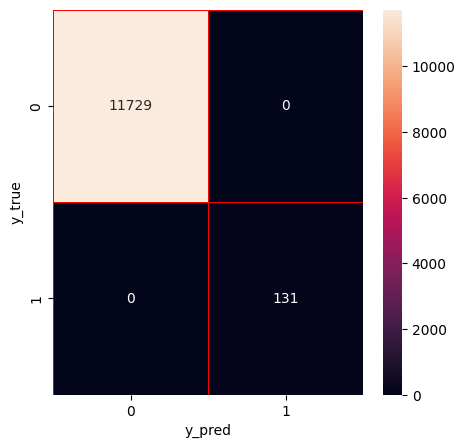

In [137]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [138]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



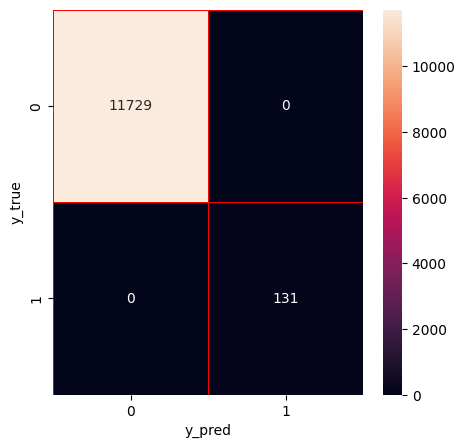

In [139]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [140]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



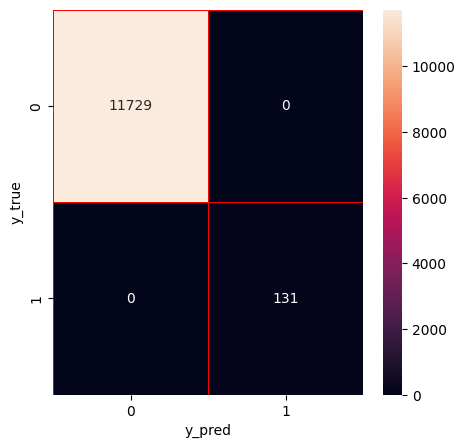

In [141]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [142]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



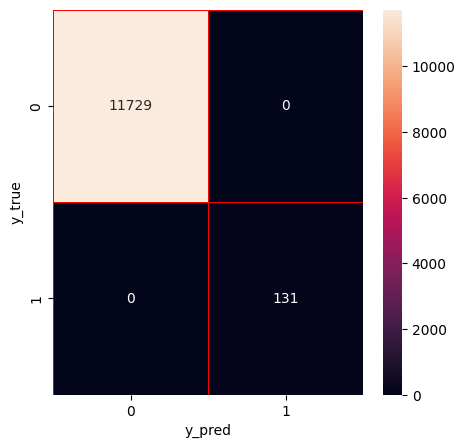

In [143]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [144]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [145]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
93821,1,1,1,1
93822,1,1,1,1
93823,1,1,1,1
93824,1,1,1,1


In [146]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [147]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [148]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



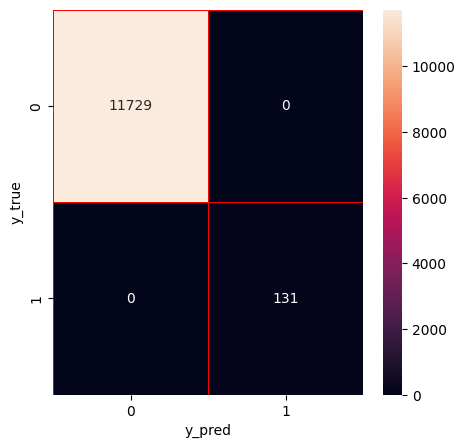

In [149]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [150]:
#Feature Selection Process

In [151]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [152]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [153]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.6032, 'traffic_category_XMRIGCC CryptoMiner'), (0.0369, 'originp'), (0.0346, 'id'), (0.0322, 'flow_iat.min'), (0.022, 'originh'), (0.0208, 'traffic_category_Benign'), (0.0184, 'bwd_header_size_max'), (0.0181, 'flow_pkts_payload.min'), (0.016, 'bwd_header_size_min'), (0.0156, 'active.min'), (0.0149, 'fwd_iat.min'), (0.0147, 'fwd_pkts_payload.min'), (0.0121, 'active.tot'), (0.0118, 'responh'), (0.0107, 'fwd_header_size_min'), (0.0093, 'traffic_category_Background'), (0.0088, 'down_up_ratio'), (0.0073, 'fwd_header_size_max'), (0.007, 'flow_pkts_per_sec'), (0.007, 'bwd_init_window_size'), (0.0051, 'fwd_iat.avg'), (0.0047, 'active.avg'), (0.0042, 'fwd_init_window_size'), (0.0038, 'bwd_pkts_tot'), (0.0037, 'bwd_pkts_per_sec'), (0.0031, 'fwd_iat.tot'), (0.003, 'flow_pkts_payload.max'), (0.003, 'bwd_pkts_payload.min'), (0.0029, 'flow_iat.tot'), (0.0029, 'active.max'), (0.0027, 'flow_iat.avg'), (0.0024, 'bwd_subflow_pkts'), (0.0024, 'bwd_data_pkts_tot'), (0.0

In [154]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [155]:
len(f_list)

90

In [156]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum >= 0.9:
        break    

In [157]:
X_fs = df[fs].values

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [159]:
X_train.shape

(47438, 17)

In [160]:
pd.Series(y_train).value_counts()

0    46913
1      525
Name: count, dtype: int64

In [161]:
#Oversampling by SMOTE

In [162]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1.0, n_jobs=-1)

In [163]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [164]:
pd.Series(y_train).value_counts()

0    46913
1    46913
Name: count, dtype: int64

In [165]:
#Modelling after feature selection:

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



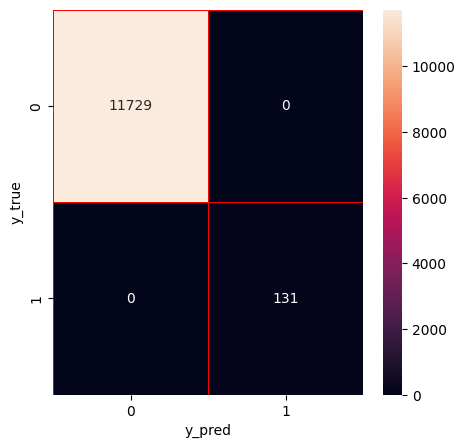

In [166]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [167]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



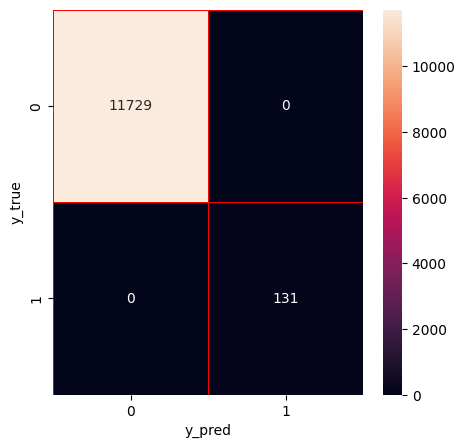

In [168]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [169]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



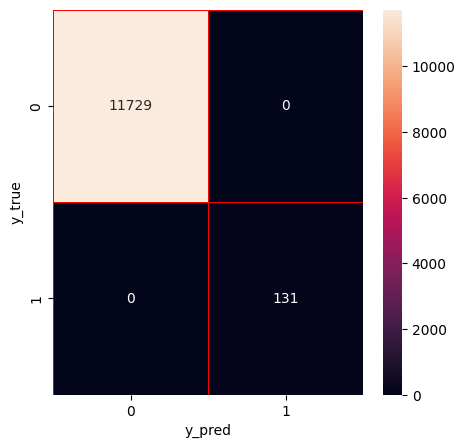

In [170]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [171]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



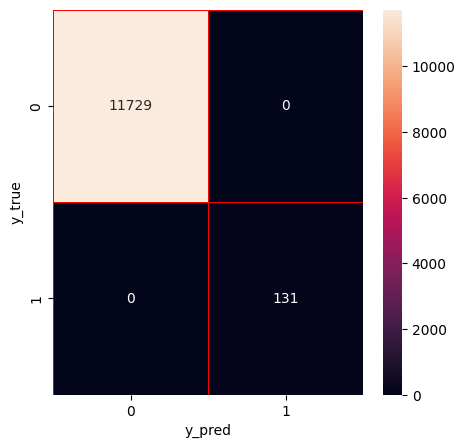

In [172]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [173]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [174]:
#Stacking Model Construction

In [175]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [176]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [177]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



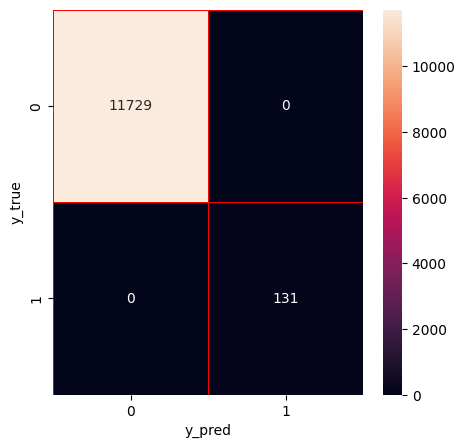

In [84]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

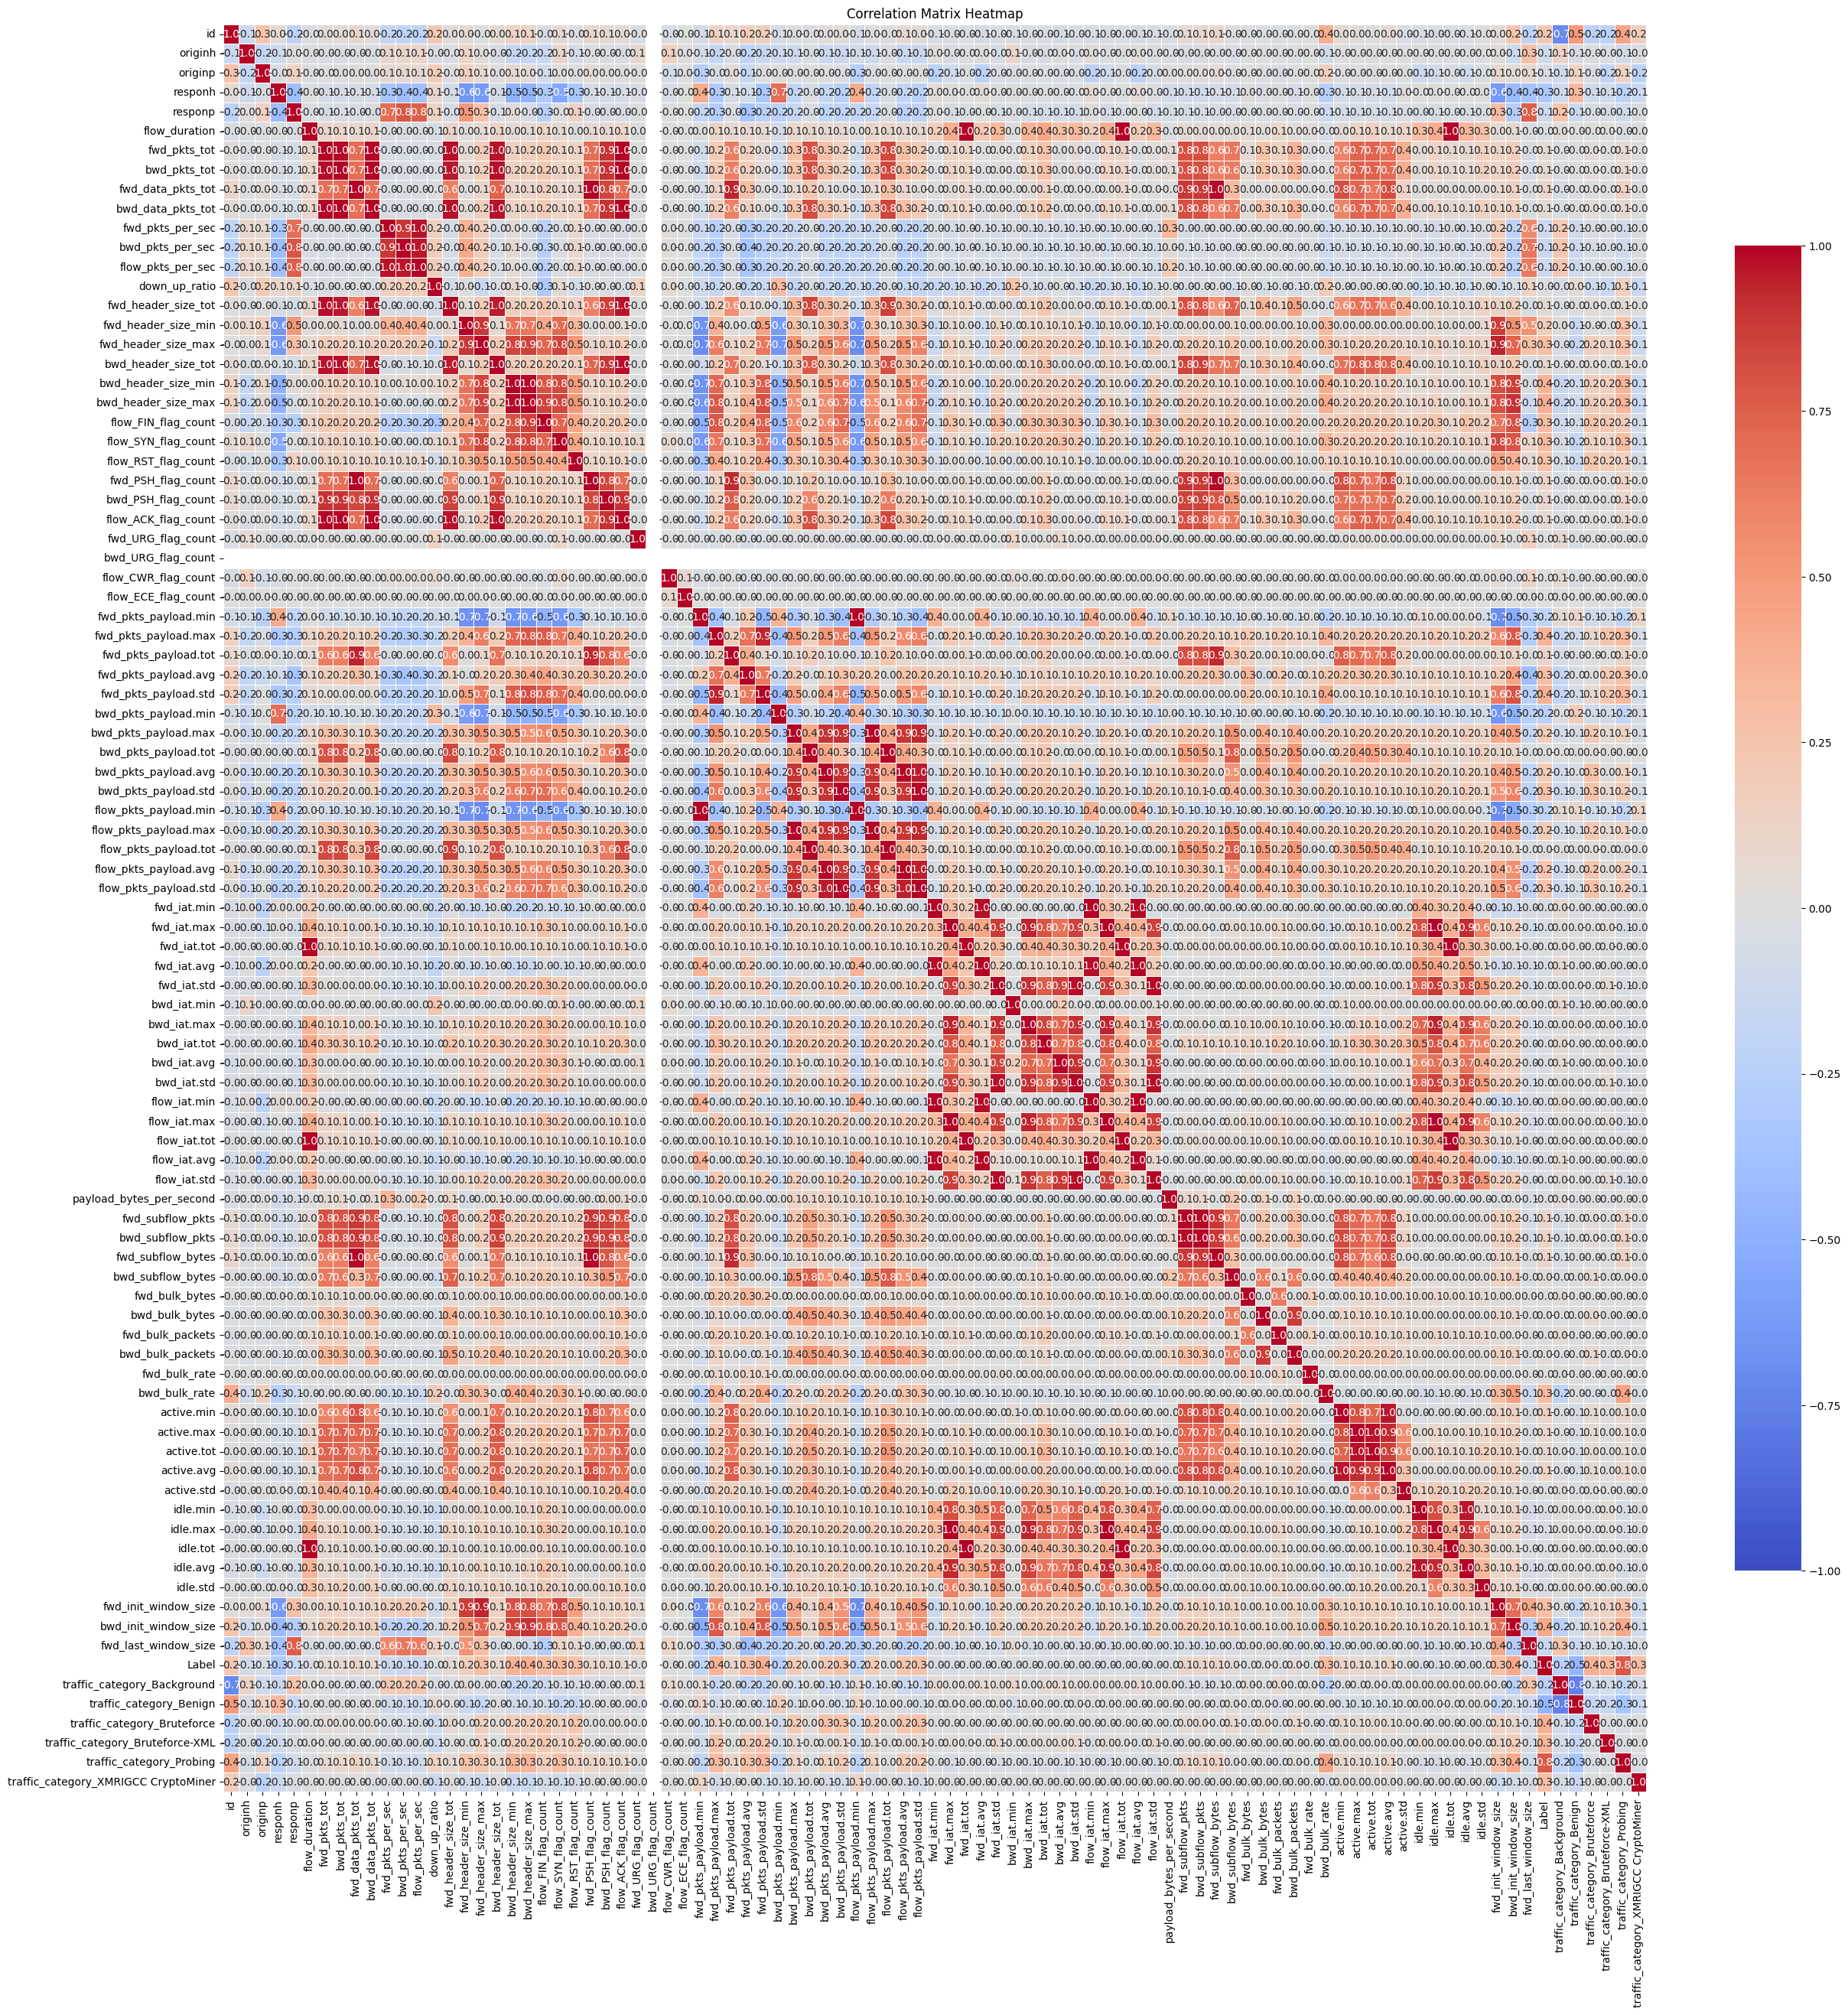

In [183]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, 
            annot=True,           # Annotate cells with the correlation values
            fmt=".1f",            # Format the annotations to two decimal places
            cmap='coolwarm',      # Color map
            vmin=-1, vmax=1,      # Value range for the colormap
            linewidths=.5,        # Line width between cells
            cbar_kws={"shrink": .75})  # Color bar size

plt.title('Correlation Matrix Heatmap')
plt.show()